In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

566

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90f461093ca64c4b9c54d64d671648e7


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [20]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 17 of Set 23 | linqiong
Processing Record 18 of Set 23 | punta arenas
Processing Record 19 of Set 23 | hithadhoo
Processing Record 20 of Set 23 | tawkar
City not found. Skipping...
Processing Record 21 of Set 23 | khatanga
Processing Record 22 of Set 23 | tubuala
Processing Record 23 of Set 23 | kapaa
Processing Record 24 of Set 23 | busselton
Processing Record 25 of Set 23 | nanortalik
Processing Record 26 of Set 23 | kavieng
Processing Record 27 of Set 23 | ornskoldsvik
Processing Record 28 of Set 23 | new norfolk
Processing Record 29 of Set 23 | saint-philippe
Processing Record 30 of Set 23 | miri
Processing Record 31 of Set 23 | attawapiskat
City not found. Skipping...
Processing Record 32 of Set 23 | rikitea
Processing Record 33 of Set 23 | jardim
Processing Record 34 of Set 23 | mataura
Processing Record 35 of Set 23 | bambous virieux
Processing Record 36 of Set 23 | ushuaia
Processing Record 37 of Set 23 | taolanaro
City not found. Skipping...
Processing Record

Processing Record 34 of Set 26 | nabire
Processing Record 35 of Set 26 | torit
Processing Record 36 of Set 26 | sabang
Processing Record 37 of Set 26 | alice springs
Processing Record 38 of Set 26 | yar-sale
Processing Record 39 of Set 26 | dudinka
Processing Record 40 of Set 26 | yulara
Processing Record 41 of Set 26 | quelimane
Processing Record 42 of Set 26 | rudnichnyy
Processing Record 43 of Set 26 | namibe
Processing Record 44 of Set 26 | palembang
Processing Record 45 of Set 26 | nome
Processing Record 46 of Set 26 | marzuq
Processing Record 47 of Set 26 | ocos
Processing Record 48 of Set 26 | tateyama
Processing Record 49 of Set 26 | touros
Processing Record 50 of Set 26 | veraval
Processing Record 1 of Set 27 | awjilah
Processing Record 2 of Set 27 | belmonte
Processing Record 3 of Set 27 | westport
Processing Record 4 of Set 27 | banda aceh
Processing Record 5 of Set 27 | marawi
Processing Record 6 of Set 27 | jalu
Processing Record 7 of Set 27 | hasaki
Processing Record 8 of

Processing Record 20 of Set 30 | chinsali
Processing Record 21 of Set 30 | pisco
Processing Record 22 of Set 30 | ahuimanu
Processing Record 23 of Set 30 | ostrovnoy
Processing Record 24 of Set 30 | vilnius
Processing Record 25 of Set 30 | inhambane
Processing Record 26 of Set 30 | cabra
Processing Record 27 of Set 30 | olinda
Processing Record 28 of Set 30 | hurghada
Processing Record 29 of Set 30 | ixtapa
Processing Record 30 of Set 30 | north platte
Processing Record 31 of Set 30 | beinamar
Processing Record 32 of Set 30 | tiznit
Processing Record 33 of Set 30 | tsnori
Processing Record 34 of Set 30 | nishihara
Processing Record 35 of Set 30 | leshukonskoye
Processing Record 36 of Set 30 | bukama
Processing Record 37 of Set 30 | pozo colorado
Processing Record 38 of Set 30 | bargal
City not found. Skipping...
Processing Record 39 of Set 30 | behbahan
Processing Record 40 of Set 30 | polovinnoye
Processing Record 41 of Set 30 | saravan
Processing Record 42 of Set 30 | ambon
Processin

City not found. Skipping...
Processing Record 6 of Set 34 | esik
Processing Record 7 of Set 34 | te anau
Processing Record 8 of Set 34 | leningradskiy
Processing Record 9 of Set 34 | vrangel
Processing Record 10 of Set 34 | sofiysk
City not found. Skipping...
Processing Record 11 of Set 34 | tiarei
Processing Record 12 of Set 34 | victor harbor
Processing Record 13 of Set 34 | bilibino
Processing Record 14 of Set 34 | ergani
Processing Record 15 of Set 34 | mabaruma
Processing Record 16 of Set 34 | semey
-----------------------------
Data Retrieval Complete      
-----------------------------


In [23]:
len(city_data)

519

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Linqiong,30.4159,103.4609,73.78,89,100,5.46,CN,2021-09-26 09:58:24
1,Punta Arenas,-53.1500,-70.9167,32.11,93,40,2.30,CL,2021-09-26 09:58:25
2,Hithadhoo,-0.6000,73.0833,82.47,75,76,15.26,MV,2021-09-26 09:58:25
3,Khatanga,71.9667,102.5000,35.55,80,100,10.38,RU,2021-09-26 09:58:26
4,Tubuala,9.5167,-79.0333,79.34,83,99,3.91,PA,2021-09-26 09:58:26
5,Kapaa,22.0752,-159.3190,76.98,84,90,3.00,US,2021-09-26 09:58:27
6,Busselton,-33.6500,115.3333,59.04,89,42,11.52,AU,2021-09-26 09:58:27
7,Nanortalik,60.1432,-45.2371,37.47,68,16,5.41,GL,2021-09-26 09:58:27
8,Kavieng,-2.5744,150.7967,82.58,79,91,10.65,PG,2021-09-26 09:58:27
9,Ornskoldsvik,63.2909,18.7153,52.75,71,92,9.22,SE,2021-09-26 09:58:28


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Linqiong,CN,2021-09-26 09:58:24,30.4159,103.4609,73.78,89,100,5.46
1,Punta Arenas,CL,2021-09-26 09:58:25,-53.1500,-70.9167,32.11,93,40,2.30
2,Hithadhoo,MV,2021-09-26 09:58:25,-0.6000,73.0833,82.47,75,76,15.26
3,Khatanga,RU,2021-09-26 09:58:26,71.9667,102.5000,35.55,80,100,10.38
4,Tubuala,PA,2021-09-26 09:58:26,9.5167,-79.0333,79.34,83,99,3.91
...,...,...,...,...,...,...,...,...,...
514,Victor Harbor,AU,2021-09-26 10:02:10,-35.5667,138.6167,59.90,81,45,6.20
515,Bilibino,RU,2021-09-26 10:02:10,68.0546,166.4372,27.34,98,100,7.52
516,Ergani,TR,2021-09-26 10:02:10,38.2653,39.7621,74.12,18,0,11.86
517,Mabaruma,GY,2021-09-26 10:02:11,8.2000,-59.7833,71.40,99,81,1.48


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

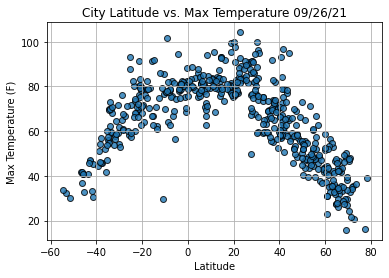

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

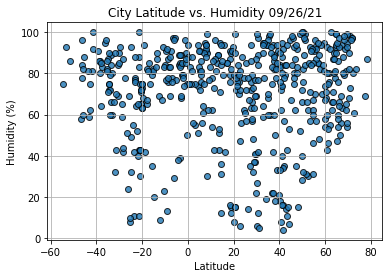

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

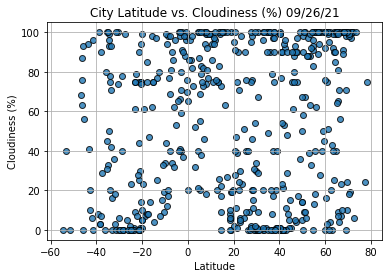

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

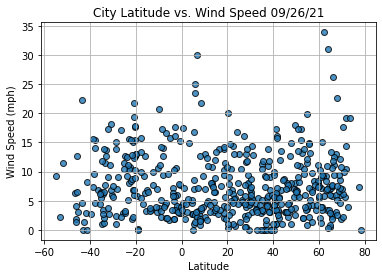

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()